### Movie Rating Prediction 

> ### Importing libraries we need for data handling, visualization, and modeling

Before jumping into the analysis and model-building part, we need to have our essential Python libraries loaded up. Libraries are like our toolbox in a data science project—they provide everything from basic tools to advanced techniques.

In [8]:
import pandas as pd         
import numpy as np           
import seaborn as sns        
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression      
from sklearn.metrics import mean_squared_error, r2_score  
import warnings
warnings.filterwarnings('ignore')

> ### Loading the IMDb dataset with specified encoding

In [13]:
imdb_data = pd.read_csv(r"C:\Users\Lenovo\Documents\GitHub\TheUltimate pandas bootcamp\MovieMind-Rating-Prediction\Data\IMDb Movies India.csv", encoding='ISO-8859-1')

> ### Displaying the first few rows of the dataset

Let’s look at a few rows from the top and bottom of the dataset to get an initial sense of the data format, structure, and any obvious irregularities.

In [14]:
imdb_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
imdb_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


Sometimes column names can contain extra spaces, unusual characters, or inconsistent formatting. Let’s check the column names to make sure they’re clean and easy to work with.

In [19]:
imdb_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [20]:
# Stripping any leading/trailing spaces from column names
imdb_data.columns = imdb_data.columns.str.strip()

In [21]:
imdb_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Duplicate entries can skew our analysis and model accuracy. Let’s check if there are any duplicate rows.

In [22]:
duplicates = imdb_data.duplicated().sum()
print("Number of duplicate rows:",duplicates)

Number of duplicate rows: 6


> ### Dropping duplicate rows if any are found

In [23]:
imdb_data = imdb_data.drop_duplicates()

Let’s look at each column in detail, which will help us understand the range, unique values, and data types of both numeric and categorical columns

In [25]:
for column in imdb_data.columns:
    unique_values = imdb_data[column].nunique()
    data_type = imdb_data[column].dtype
    print(f"Column '{column}' has {unique_values} unique values and is of type {data_type}.")

Column 'Name' has 13838 unique values and is of type object.
Column 'Year' has 102 unique values and is of type object.
Column 'Duration' has 182 unique values and is of type object.
Column 'Genre' has 485 unique values and is of type object.
Column 'Rating' has 84 unique values and is of type float64.
Column 'Votes' has 2034 unique values and is of type object.
Column 'Director' has 5938 unique values and is of type object.
Column 'Actor 1' has 4718 unique values and is of type object.
Column 'Actor 2' has 4891 unique values and is of type object.
Column 'Actor 3' has 4820 unique values and is of type object.


For categorical columns (like genre, director, actors), it’s helpful to see the unique values and their counts to understand the distribution.

#### Cleaning 'Year' By Removing Special Characters and converting to int 

In [28]:
imdb_data['Year'] = imdb_data['Year'].str.extract(r'(\d{4})').astype(float)

#### Cleaning 'Duration' to keep only numeric part (assumes format like '109 min')

In [29]:
imdb_data['Duration'] = imdb_data['Duration'].str.extract(r'(\d+)').astype(float)

Filling Missing 'Rating' With Median Value 

In [31]:
imdb_data['Rating'].fillna(imdb_data['Rating'].median(), inplace=True)

#### Filling or dropping missing values in other relevant columns as per need

In [32]:
imdb_data.dropna(subset=['Genre', 'Director'], inplace=True)

For categorical columns like Genre, Director, and Actors, decide on an encoding method (e.g., one-hot encoding or label encoding).

> ### Example: One-hot encoding the 'Genre' column

In [33]:
genre_dummies = imdb_data['Genre'].str.get_dummies(sep=',')
imdb_data = pd.concat([imdb_data, genre_dummies], axis=1)

In [36]:
genre_dummies

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15503,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since we identified duplicates, removing them will help in achieving a cleaner dataset.

In [35]:
imdb_data.drop_duplicates(inplace=True)
duplicates

np.int64(6)

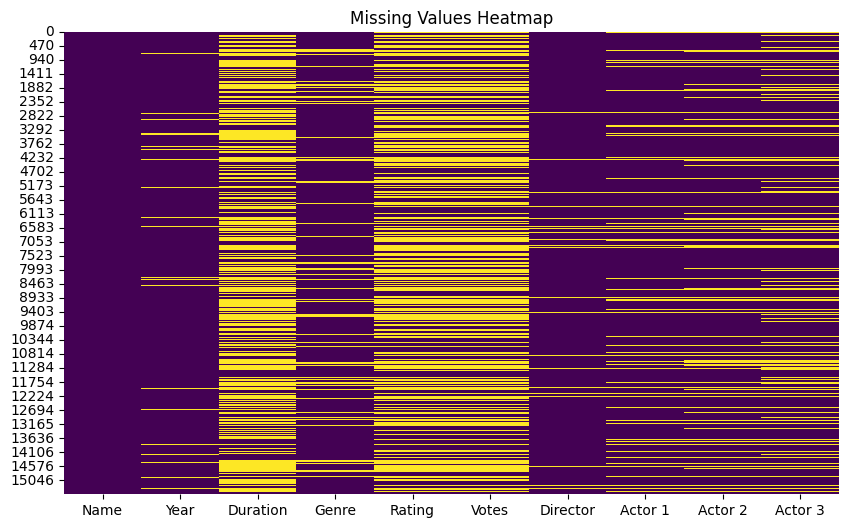

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(imdb_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()